In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from paretoset import paretoset

In [2]:
nobj = 3
ncon = 0
nvar = 38

In [3]:
colnames=['gen']
colnames.extend(['obj'+str(i) for i in range(nobj)])
colnames.extend(['con'+str(i) for i in range(ncon)])
colnames.extend(['var'+str(i) for i in range(nvar)])

In [4]:
base_path = '../../output/adaptivesearch/cpsd/'

In [5]:
fname = base_path + '16/history_NSGAII_DTLZ2_1.txt'

In [6]:
df = pd.read_csv(fname, delimiter=' ', header=None, names=colnames)

In [7]:
gen, obj1, obj2, obj3 = df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3]

In [8]:
gen = gen + 1

In [9]:
ngen = max(gen)

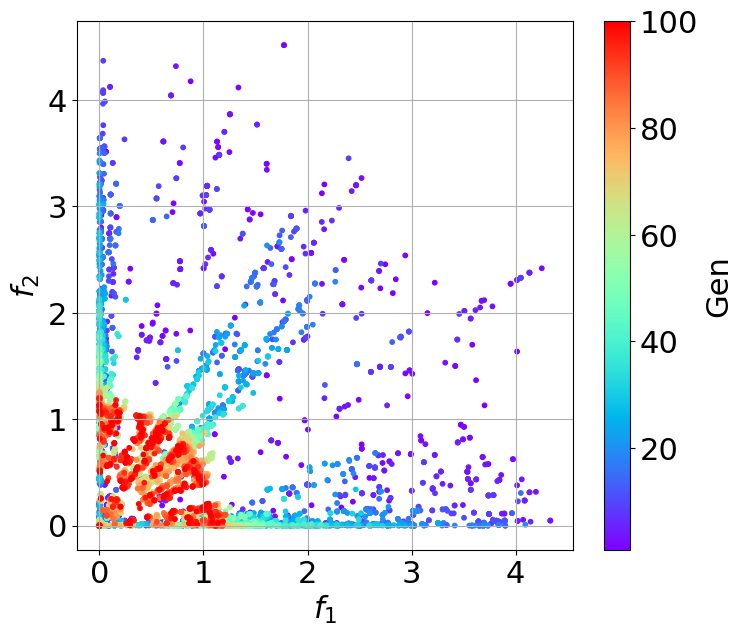

In [10]:
cmap = plt.get_cmap('rainbow')

fig = plt.figure(figsize=(8,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size

sc = plt.scatter(obj1, obj2, s=10, c=gen, cmap=cmap, vmin=1, vmax=ngen)
plt.grid()

plt.xlabel('$f_1$')
plt.ylabel('$f_2$')
plt.colorbar(sc, label='Gen')
plt.show()

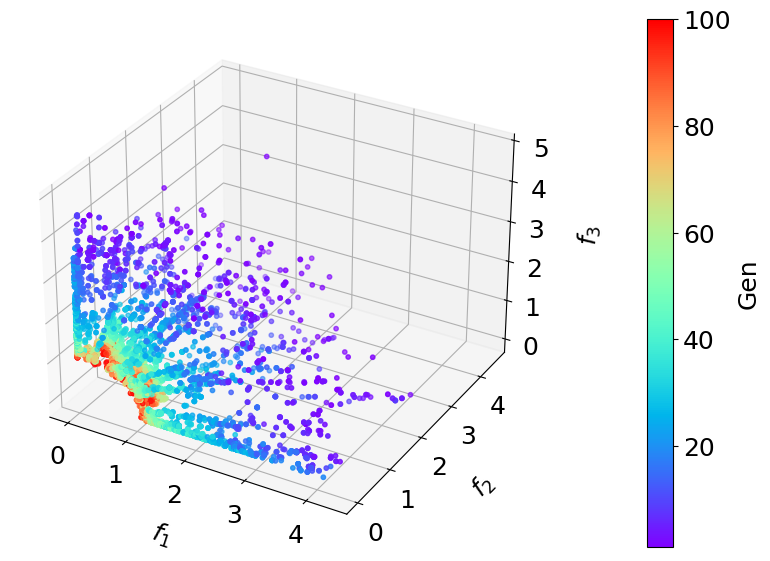

In [11]:
fig = plt.figure(figsize=(14,7), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size

ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(obj1, obj2, obj3, s=10, c=gen, cmap=cmap, vmin=1, vmax=ngen)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$f_1$', labelpad=15, fontsize=18)
ax.set_ylabel('$f_2$', labelpad=15, fontsize=18)
ax.set_zlabel('$f_3$', labelpad=15, fontsize=18)
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Gen', fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.show()

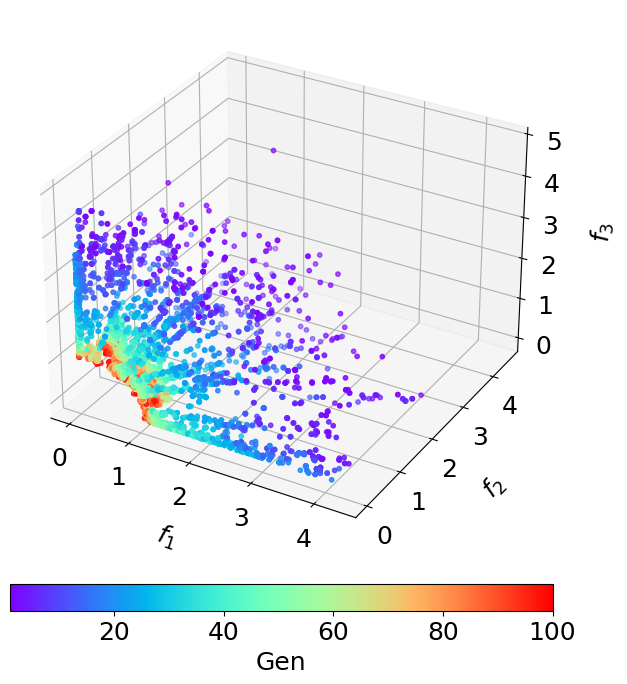

In [12]:
fig = plt.figure(figsize=(7,14), dpi=100) # figure size
plt.rcParams["font.size"] = 22 # whole font size

ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(obj1, obj2, obj3, s=10, c=gen, cmap=cmap, vmin=1, vmax=ngen)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$f_1$', labelpad=15, fontsize=18)
ax.set_ylabel('$f_2$', labelpad=15, fontsize=18)
ax.set_zlabel('$f_3$', labelpad=15, fontsize=18) 
cbar = plt.colorbar(sc, orientation='horizontal', pad=0.03)
cbar.set_label('Gen', fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.show()

In [16]:
# Generate mesh
angle = np.linspace(0, 0.5 * np.pi, 16)
theta, phi = np.meshgrid(angle, angle)
r = 1
X = r * np.cos(phi) * np.cos(theta)
Y = r * np.cos(phi) * np.sin(theta)
Z = r * np.sin(phi)

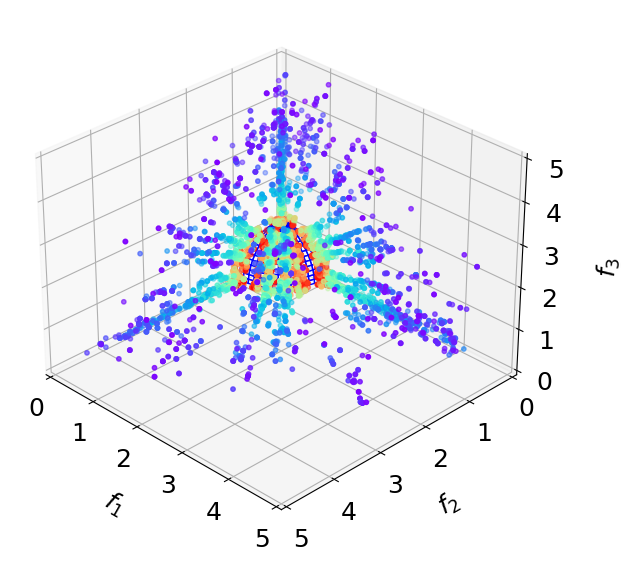

ax.azim -45
ax.elev 30


In [20]:
# Display the mesh
fig = plt.figure(figsize=(8,7), dpi=100) # figure size
# plt.rcParams["font.size"] = 22 # whole font size
ax = fig.add_subplot(111, projection='3d')
azim, elev = ax.azim, ax.elev
azim = -45
ax.view_init(elev, azim)

ax.plot_surface(X, Y, Z, color = 'w', edgecolor='b', shade=False, rstride = 1, cstride = 1, alpha=0.5)
ax.scatter(obj1, obj2, obj3, s=10, c=gen, cmap=cmap, vmin=1, vmax=ngen)

ax.set_xlim3d(0, max(obj1))
ax.set_ylim3d(max(obj2), 0)
ax.set_zlim3d(0, max(obj3))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$f_1$', labelpad=15, fontsize=18)
ax.set_ylabel('$f_2$', labelpad=15, fontsize=18)
ax.set_zlabel('$f_3$', labelpad=15, fontsize=18)
plt.show()

print(f'ax.azim {ax.azim}')
print(f'ax.elev {ax.elev}')

In [21]:
objs = df.iloc[:, 1:4]

In [22]:
mask = paretoset(objs, sense=['min','min','min'])

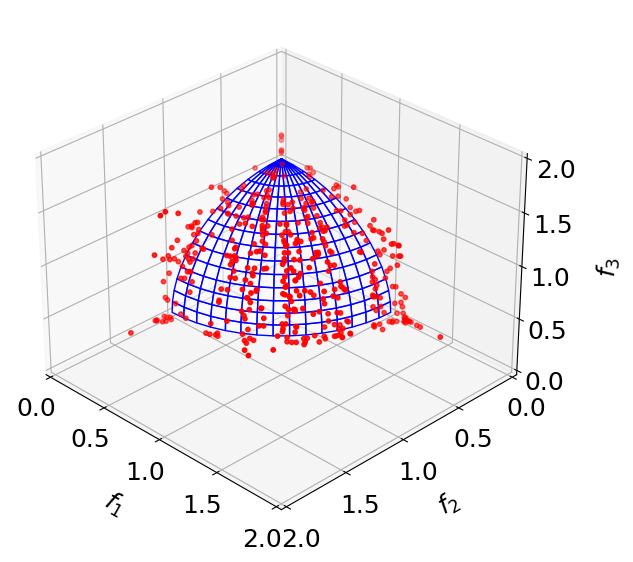

ax.azim -45
ax.elev 30


In [23]:
# Display the mesh
fig = plt.figure(figsize=(8,7), dpi=100) # figure size
# plt.rcParams["font.size"] = 22 # whole font size
ax = fig.add_subplot(111, projection='3d')
azim, elev = ax.azim, ax.elev
azim = -45
ax.view_init(elev, azim)

ax.plot_surface(X, Y, Z, color = 'w', edgecolor='b', shade=False, rstride = 1, cstride = 1, alpha=0.5)
ax.scatter(objs[mask]['obj0'], objs[mask]['obj1'], objs[mask]['obj2'], s=10, c='r')

ax.set_xlim3d(0, max(objs[mask]['obj0']))
ax.set_ylim3d(max(objs[mask]['obj1']), 0)
ax.set_zlim3d(0, max(objs[mask]['obj2']))
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_xlabel('$f_1$', labelpad=15, fontsize=18)
ax.set_ylabel('$f_2$', labelpad=15, fontsize=18)
ax.set_zlabel('$f_3$', labelpad=15, fontsize=18)
plt.show()

print(f'ax.azim {ax.azim}')
print(f'ax.elev {ax.elev}')